In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [70]:
History_Data['Hour'] = History_Data['Hour'] - 1


In [71]:
History_Data2 = History_Data.copy()
History_Data2['Year'] = History_Data2['Year'] + 2

In [72]:
#History_Data2

In [73]:
History_Data['Year'] = History_Data['Year'].astype(str)
History_Data['Month'] = History_Data['Month'].astype(str)
History_Data['Day'] = History_Data['Day'].astype(str)
History_Data['Hour'] = History_Data['Hour'].astype(str)
History_Data['Datetime'] = (History_Data['Year']) +'-' + (History_Data['Month']) +'-' + (History_Data['Day']) \
                           + '-' + (History_Data['Hour'])


History_Data2['Year'] = History_Data2['Year'].astype(str)
History_Data2['Month'] = History_Data2['Month'].astype(str)
History_Data2['Day'] = History_Data2['Day'].astype(str)
History_Data2['Hour'] = History_Data2['Hour'].astype(str)
History_Data2['Datetime'] = (History_Data2['Year']) +'-' + (History_Data2['Month']) +'-' + (History_Data2['Day']) \
                           + '-' + (History_Data2['Hour'])



In [74]:
History_Data= History_Data.dropna()
History_Data2= History_Data2.dropna()

In [75]:
History_Data.drop('Year', axis =1 , inplace= True)
History_Data.drop('Month', axis =1 , inplace= True)
History_Data.drop('Day', axis =1 , inplace= True)
History_Data.drop('Hour', axis =1 , inplace= True)
History_Data['Timestamp'] = pd.to_datetime(History_Data.Datetime,format='%Y-%m-%d-%H') 
History_Data2['Timestamp'] = pd.to_datetime(History_Data.Datetime,format='%Y-%m-%d-%H') 

train=History_Data
#test=History_Data.iloc[17520:26303,:]

In [78]:
History_Data2

,Year,Month,Day,Hour,T,Load_kW,Datetime,Timestamp
Timestamp,,,,,,,,
2002-01-01 00:00:00,2004,1,1,0,36.0,387190.0,2004-1-1-0,2002-01-01 00:00:00
2002-01-01 01:00:00,2004,1,1,1,35.0,389977.0,2004-1-1-1,2002-01-01 01:00:00
2002-01-01 02:00:00,2004,1,1,2,34.0,391881.0,2004-1-1-2,2002-01-01 02:00:00
2002-01-01 03:00:00,2004,1,1,3,32.0,396362.0,2004-1-1-3,2002-01-01 03:00:00
2002-01-01 04:00:00,2004,1,1,4,33.0,408553.0,2004-1-1-4,2002-01-01 04:00:00
2002-01-01 05:00:00,2004,1,1,5,32.0,426902.0,2004-1-1-5,2002-01-01 05:00:00
2002-01-01 06:00:00,2004,1,1,6,31.0,449139.0,2004-1-1-6,2002-01-01 06:00:00
2002-01-01 07:00:00,2004,1,1,7,32.0,473425.0,2004-1-1-7,2002-01-01 07:00:00
2002-01-01 08:00:00,2004,1,1,8,36.0,487921.0,2004-1-1-8,2002-01-01 08:00:00


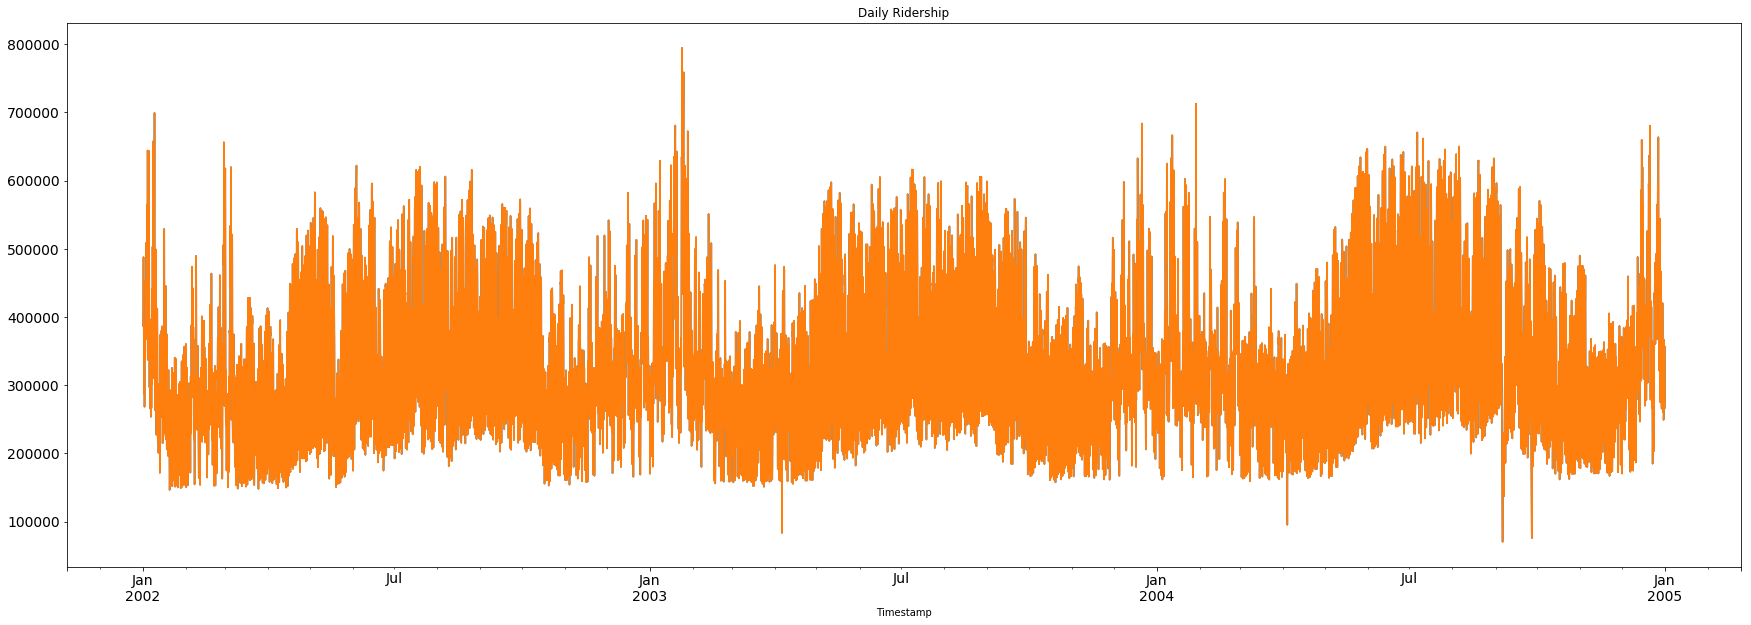

In [76]:
#History_Data.index = History_Data.Timestamp 
train.index = train.Timestamp 
#test.index = test.Timestamp 
History_Data2.index = History_Data2.Timestamp
train['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
History_Data2['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

In [ ]:
History_Data_2year_after = History_Data.shift(365*24*2)
History_Data_2year_after = History_Data_2year_after[['Load_kW', 'Timestamp']]

In [ ]:
History_Data

In [ ]:
History_Data_2year_after

In [12]:
History_Data_2year_after = History_Data_2year_after.dropna()
History_Data_2year_after

,Load_kW,Timestamp
Timestamp,,
2004-01-01 00:00:00,387190.0,2002-01-01 00:00:00
2004-01-01 01:00:00,389977.0,2002-01-01 01:00:00
2004-01-01 02:00:00,391881.0,2002-01-01 02:00:00
2004-01-01 03:00:00,396362.0,2002-01-01 03:00:00
2004-01-01 04:00:00,408553.0,2002-01-01 04:00:00
2004-01-01 05:00:00,426902.0,2002-01-01 05:00:00
2004-01-01 06:00:00,449139.0,2002-01-01 06:00:00
2004-01-01 07:00:00,473425.0,2002-01-01 07:00:00
2004-01-01 08:00:00,487921.0,2002-01-01 08:00:00


In [76]:
test

,T,Load_kW,Datetime,Timestamp
Timestamp,,,,
2004-01-01 00:00:00,46.0,251611.0,2004-1-1-0,2004-01-01 00:00:00
2004-01-01 01:00:00,45.0,246499.0,2004-1-1-1,2004-01-01 01:00:00
2004-01-01 02:00:00,43.0,239736.0,2004-1-1-2,2004-01-01 02:00:00
2004-01-01 03:00:00,43.0,235836.0,2004-1-1-3,2004-01-01 03:00:00
2004-01-01 04:00:00,43.0,239219.0,2004-1-1-4,2004-01-01 04:00:00
2004-01-01 05:00:00,42.0,249191.0,2004-1-1-5,2004-01-01 05:00:00
2004-01-01 06:00:00,40.0,263114.0,2004-1-1-6,2004-01-01 06:00:00
2004-01-01 07:00:00,41.0,281236.0,2004-1-1-7,2004-01-01 07:00:00
2004-01-01 08:00:00,48.0,306074.0,2004-1-1-8,2004-01-01 08:00:00


In [77]:
y_hat_avg = test[['Load_kW', 'Timestamp']]
y_hat_avg['Holt_Winter'] = pd.merge(y_hat_avg, History_Data_2year_after, how = 'inner',
                     left_index= True, right_index= True)['Load_kW_y']
y_hat_avg 

/Users/yifengwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Load_kW,Timestamp,Holt_Winter
Timestamp,,,
2004-01-01 00:00:00,251611.0,2004-01-01 00:00:00,387190.0
2004-01-01 01:00:00,246499.0,2004-01-01 01:00:00,389977.0
2004-01-01 02:00:00,239736.0,2004-01-01 02:00:00,391881.0
2004-01-01 03:00:00,235836.0,2004-01-01 03:00:00,396362.0
2004-01-01 04:00:00,239219.0,2004-01-01 04:00:00,408553.0
2004-01-01 05:00:00,249191.0,2004-01-01 05:00:00,426902.0
2004-01-01 06:00:00,263114.0,2004-01-01 06:00:00,449139.0
2004-01-01 07:00:00,281236.0,2004-01-01 07:00:00,473425.0
2004-01-01 08:00:00,306074.0,2004-01-01 08:00:00,487921.0


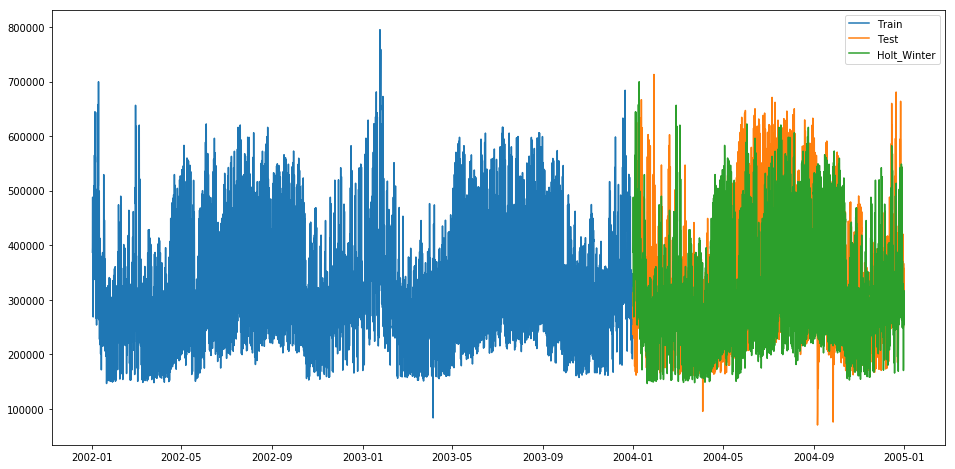

In [84]:
plt.figure(figsize=(16,8))

plt.plot(train['Load_kW'], label='Train')
plt.plot(test['Load_kW'], label='Test')
#plt.plot(testActual['Load_kW'], label='Test Actual')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [85]:
rms = sqrt(mean_squared_error(test['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)
mape = mean_absolute_percentage_error(test['Load_kW'], y_hat_avg['Holt_Winter'])
print(mape)

90256.88668671959
19.757647724557806
